<a href="https://www.kaggle.com/code/shaikhabdulrafay03/taylor-swift-data?scriptVersionId=159023249" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import nltk
import spacy
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import string
from spacy.lang.en import English
from plotly.subplots import make_subplots


nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
from nltk.corpus import stopwords
stop = stopwords.words('english')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/kaggle/input/taylor-swifts-youtube-stats-symphony/taylor_swift_videos.csv


In [2]:
df = pd.read_csv(r"/kaggle/input/taylor-swifts-youtube-stats-symphony/taylor_swift_videos.csv")

df

,title,published_at,duration,view_count
0,Taylor Swift - You're Losing Me (From The Vault),2023-11-29T13:00:47Z,PT4M39S,7278886
1,"Rent on demand starting … you guessed it, Dece...",2023-11-27T20:21:45Z,PT1M1S,1050064
2,✨🫶 My name is Taylor and I was born in 1989 🫶✨,2023-10-31T20:08:57Z,PT19S,1196267
3,Taylor Swift - Cruel Summer (LP Giobbi Remix),2023-10-19T00:30:06Z,PT3M19S,696792
4,Taylor Swift - Cruel Summer (Live from Taylor ...,2023-10-19T00:30:25Z,PT3M55S,3437493
...,...,...,...,...
218,First fans with my CMT Award.,2008-06-26T21:55:43Z,PT11S,337626
219,TRL Recap!,2008-06-26T21:15:51Z,PT3M8S,742898
220,Wannabe,2008-06-26T21:02:39Z,PT3M45S,1217405
221,:-),2008-06-26T20:51:09Z,PT34S,805812


In [3]:
print("DataFrame Information:")
print("-" * 30)
print('DF Shape: ' ,df.shape)
print('number of Columns: ' ,len(df.columns))
print('number of Observations: ' ,len(df))
print('Number of values in df: ' , df.count().sum())
print('Total Number of Missing values in df: ' , df.isna().sum().sum())
print('percentage of Missing values : ' ,  "{:.2f}".format(df.isna().sum().sum()/df.count().sum() *100),'%')
print('Total Number of Duplicated records in df : ' , df.duplicated().sum().sum())
print('percentage of Duplicated values : ' ,  "{:.2f}".format(df.duplicated().sum().sum()/df.count().sum() *100),'%')

DataFrame Information:
------------------------------
DF Shape:  (223, 4)
number of Columns:  4
number of Observations:  223
Number of values in df:  892
Total Number of Missing values in df:  0
percentage of Missing values :  0.00 %
Total Number of Duplicated records in df :  0
percentage of Duplicated values :  0.00 %


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         223 non-null    object
 1   published_at  223 non-null    object
 2   duration      223 non-null    object
 3   view_count    223 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 7.1+ KB


In [5]:
df['published_at'] = pd.to_datetime(df['published_at'])
df['date'] = df['published_at'].dt.date
df['time'] = df['published_at'].dt.time

In [6]:
from datetime import time
def fromat_duration(value):
    s = value.strip('PT')
    s = s.split('M')
    if len(s) > 1:
        if s[1] != '':
            sec = s[1].strip('S')
        else:
            sec = 0
        min = s[0]
    else:
        min = '0'
        sec = s[0].strip('S')
        
    return time(minute= int(min) , second=int(sec))
         

def time_in_seconds(value):
    return (value.minute * 60) + value.second

df['duration'] = df['duration'].apply(fromat_duration)
df['time_in_sec'] = df['duration'].apply(time_in_seconds)


    

In [7]:
df

,title,published_at,duration,view_count,date,time,time_in_sec
0,Taylor Swift - You're Losing Me (From The Vault),2023-11-29 13:00:47+00:00,00:04:39,7278886,2023-11-29,13:00:47,279
1,"Rent on demand starting … you guessed it, Dece...",2023-11-27 20:21:45+00:00,00:01:01,1050064,2023-11-27,20:21:45,61
2,✨🫶 My name is Taylor and I was born in 1989 🫶✨,2023-10-31 20:08:57+00:00,00:00:19,1196267,2023-10-31,20:08:57,19
3,Taylor Swift - Cruel Summer (LP Giobbi Remix),2023-10-19 00:30:06+00:00,00:03:19,696792,2023-10-19,00:30:06,199
4,Taylor Swift - Cruel Summer (Live from Taylor ...,2023-10-19 00:30:25+00:00,00:03:55,3437493,2023-10-19,00:30:25,235
...,...,...,...,...,...,...,...
218,First fans with my CMT Award.,2008-06-26 21:55:43+00:00,00:00:11,337626,2008-06-26,21:55:43,11
219,TRL Recap!,2008-06-26 21:15:51+00:00,00:03:08,742898,2008-06-26,21:15:51,188
220,Wannabe,2008-06-26 21:02:39+00:00,00:03:45,1217405,2008-06-26,21:02:39,225
221,:-),2008-06-26 20:51:09+00:00,00:00:34,805812,2008-06-26,20:51:09,34


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   title         223 non-null    object             
 1   published_at  223 non-null    datetime64[ns, UTC]
 2   duration      223 non-null    object             
 3   view_count    223 non-null    int64              
 4   date          223 non-null    object             
 5   time          223 non-null    object             
 6   time_in_sec   223 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 12.3+ KB


In [9]:
df[df['time_in_sec'] < 60]

,title,published_at,duration,view_count,date,time,time_in_sec
2,✨🫶 My name is Taylor and I was born in 1989 🫶✨,2023-10-31 20:08:57+00:00,00:00:19,1196267,2023-10-31,20:08:57,19
5,The Eras Tour concert film is now officially c...,2023-09-26 11:58:51+00:00,00:00:31,1338900,2023-09-26,11:58:51,31
6,Thank you for making these reveals so much cha...,2023-09-20 22:13:54+00:00,00:00:29,857197,2023-09-20,22:13:54,29
8,Pre order 1989 (Taylor’s Version) now on my si...,2023-08-10 06:26:11+00:00,00:00:16,1489197,2023-08-10,06:26:11,16
9,Summer forecast: Cruel. 😎,2023-07-21 18:56:15+00:00,00:00:26,2505814,2023-07-21,18:56:15,26
...,...,...,...,...,...,...,...
194,New conference table.,2010-03-12 16:10:46+00:00,00:00:31,1318531,2010-03-12,16:10:46,31
207,Retainers.,2008-11-17 21:25:40+00:00,00:00:59,3195952,2008-11-17,21:25:40,59
217,My band has bad private plane manners.,2008-06-26 21:58:19+00:00,00:00:25,837052,2008-06-26,21:58:19,25
218,First fans with my CMT Award.,2008-06-26 21:55:43+00:00,00:00:11,337626,2008-06-26,21:55:43,11


In [10]:
df[df['view_count'] > 10000000]

,title,published_at,duration,view_count,date,time,time_in_sec
7,TAYLOR SWIFT | THE ERAS TOUR Concert Film Offi...,2023-08-31 12:17:49+00:00,00:01:30,11545908,2023-08-31,12:17:49,90
11,Taylor Swift - Snow On The Beach (Feat. More L...,2023-05-26 04:00:01+00:00,00:03:50,11267965,2023-05-26,04:00:01,230
23,"It’s me, Benjamin 🐱 joining the #TSAntiHeroCha...",2022-11-11 17:04:21+00:00,00:00:16,50506505,2022-11-11,17:04:21,16
29,"It’s me, 👋 sharing ALL the problems. Join the ...",2022-11-04 14:53:16+00:00,00:00:16,57972784,2022-11-04,14:53:16,16
31,Total surprise 😉 Share yours with #TSAntiHero...,2022-11-01 12:31:39+00:00,00:00:16,78028885,2022-11-01,12:31:39,16
33,🫣 Join my #TSAntiHeroChallenge and share your ...,2022-10-21 12:10:21+00:00,00:00:16,125922041,2022-10-21,12:10:21,16
34,😺 Join my #TSAntiHeroChallenge and share your ...,2022-10-21 12:10:06+00:00,00:00:16,105500781,2022-10-21,12:10:06,16
51,Taylor Swift - Lover Remix Feat. Shawn Mendes ...,2019-11-13 12:27:46+00:00,00:03:42,39230523,2019-11-13,12:27:46,222
57,Taylor Swift - Lover's Lounge (Live),2019-08-22 21:47:44+00:00,00:33:43,15966196,2019-08-22,21:47:44,2023
58,Taylor Swift - Livestream Announcement (8/22/1...,2019-08-15 18:06:59+00:00,00:00:40,13821516,2019-08-15,18:06:59,40


In [11]:
df['title'] = df['title'].apply(str.lower)

In [12]:
#all taylor swift songs
import requests as req
soups = []
for i in range(1 , 5):
    r = req.get(f"https://www.oldies.com/artist-songs/Taylor-Swift/page_{i}.html")
    print(r.status_code)
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(r.text , "lxml")
    soups.append(soup)

200
200
200
200


In [13]:
name =[]
for soup in soups:
    names = soup.find_all('span' , {'class' : 'PLT'})   
    print(len(names))
    for i in names:
        name.append(i.string) 

521
350
0
0


In [14]:
songnames = [song.lower() for song in name]

In [15]:
def tour (title  , duration):
    x = ''
    if pd.Series(title).str.contains('tour').bool():
       x =  x +' tour'
        
    if pd.Series(title).str.contains('behind the scenes').bool():
        x = x + ' BTS'             

    if pd.Series(title).str.contains('short').bool():
        x = x + ' short'
    elif duration < 60:
        x = x + ' short'
    if pd.Series(title).str.contains('remix').bool():
        x = x + ' remix'            

    if pd.Series(title).str.contains('trailer').bool():
        x = x + ' trailer'            
    
    if pd.Series(title).str.contains('featuring').bool():
        x = x + ' featuring'            

    if  any(keyword.lower() in title for keyword in songnames ):
        x = x+' music'

    if duration < 60:
        x = x + ' short'
    if  x == '':
        return None      
    return x
df['Tags'] = df['Tags'] = df.apply(lambda row: tour(row['title'], row['time_in_sec']), axis=1)



In [16]:
tags = df['Tags'].str.get_dummies(sep=' ')

In [17]:
tags

,BTS,featuring,music,remix,short,tour,trailer
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,1,0,0,0
4,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...
218,0,0,0,0,1,0,0
219,0,0,0,0,0,0,0
220,0,0,0,0,0,0,0
221,0,0,0,0,1,0,0


In [18]:
df = pd.concat([df , tags] ,axis=1 )

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   title         223 non-null    object             
 1   published_at  223 non-null    datetime64[ns, UTC]
 2   duration      223 non-null    object             
 3   view_count    223 non-null    int64              
 4   date          223 non-null    object             
 5   time          223 non-null    object             
 6   time_in_sec   223 non-null    int64              
 7   Tags          181 non-null    object             
 8   BTS           223 non-null    int64              
 9   featuring     223 non-null    int64              
 10  music         223 non-null    int64              
 11  remix         223 non-null    int64              
 12  short         223 non-null    int64              
 13  tour          223 non-null    int64              
 14  trailer   

In [20]:
df.describe()

,view_count,time_in_sec,BTS,featuring,music,remix,short,tour,trailer
count,2.230000e+02,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,4.245633e+06,173.605381,0.067265,0.008969,0.565022,0.062780,0.322870,0.107623,0.031390
std,1.401885e+07,254.861005,0.251043,0.094489,0.496869,0.243113,0.468625,0.310601,0.174762
min,4.781500e+04,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.871150e+05,43.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.571970e+05,122.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.224946e+06,223.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.259220e+08,2553.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.describe(include='object')

,title,duration,date,time,Tags
count,223,223,223,223,181
unique,223,151,162,222,20
top,taylor swift - you're losing me (from the vault),00:00:31,2011-02-14,04:00:01,music
freq,1,16,10,2,69


In [22]:
tags['music'].value_counts()

music
1    126
0     97
Name: count, dtype: int64

In [23]:
line_chart = px.line(df, x='date', y='view_count', title='Line Chart')
line_chart.show()

In [24]:
line = px.line(df, x='time', y='view_count', title='Line Chart')
line.show()


In [25]:
temp = df.sort_values(by='time_in_sec' , ascending= True)
px.line(temp , x = 'time_in_sec' , y = 'view_count' , ) 


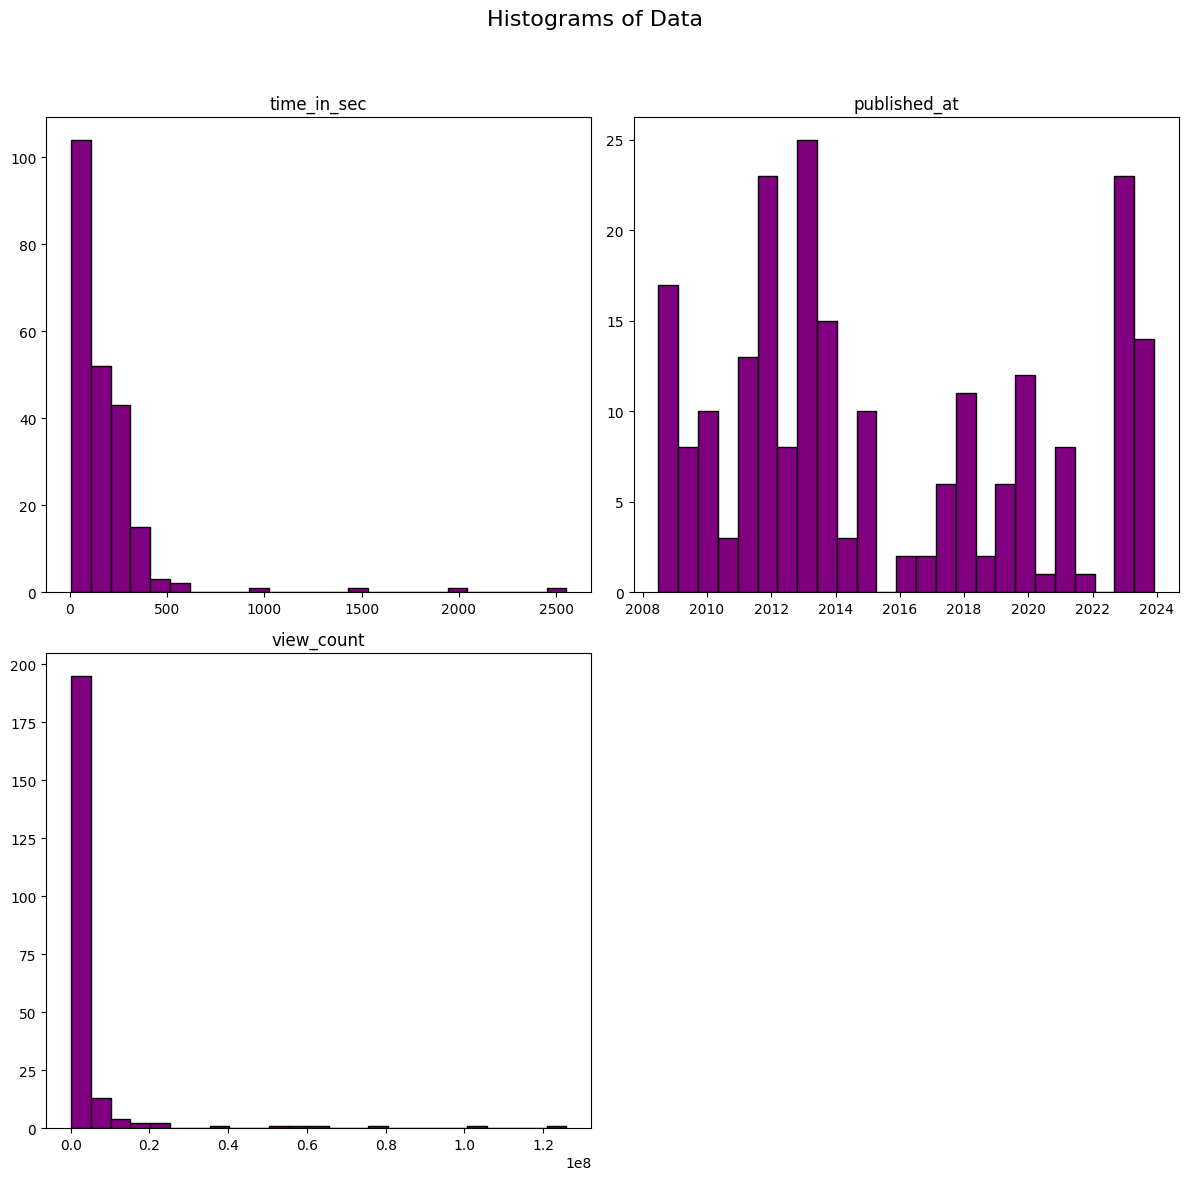

In [26]:


df[['time_in_sec' ,'published_at' , 'view_count'] ].hist(bins = 25, color='purple', edgecolor='black', grid=False , figsize = (12, 12) )
# Add titles and labels
plt.suptitle('Histograms of Data', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing between subplots
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Modify tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove outer spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [27]:
fig = make_subplots(rows=3, cols=3 ,subplot_titles=['BTS','featuring','music','remix','tour','trailer' , 'short'] )
# Add histograms
fig.add_trace(go.Histogram(x=df['BTS']), row=1, col=1)
fig.add_trace(go.Histogram(x=df['featuring']), row=1, col=2)
fig.add_trace(go.Histogram(x=df['music']), row=1, col=3)
fig.add_trace(go.Histogram(x=df['remix']), row=2, col=1)
fig.add_trace(go.Histogram(x=df['tour']), row=2, col=2)
fig.add_trace(go.Histogram(x=df['trailer']), row=2, col=3)
fig.add_trace(go.Histogram(x=df['short']), row=3, col=1)




In [28]:
port_stem = PorterStemmer()
def stemming(title):
    stemmed_title = title.lower()
    stemmed_title = stemmed_title.split()
    stemmed_title = [port_stem.stem(word) for word in stemmed_title if not word in stopwords.words('english')]
    stemmed_title = ' '.join(stemmed_title)
    return stemmed_title

df['title'] = df['title'].apply(stemming)

In [29]:
df['title']

0                       taylor swift - lose (from vault)
1             rent demand start … guess it, decemb 13 🫶💋
2                            ✨🫶 name taylor born 1989 🫶✨
3          taylor swift - cruel summer (lp giobbi remix)
4      taylor swift - cruel summer (live taylor swift...
                             ...                        
218                                 first fan cmt award.
219                                           trl recap!
220                                               wannab
221                                                  :-)
222                                                 said
Name: title, Length: 223, dtype: object

In [30]:
import torch
from transformers import DistilBertTokenizer, DistilBertModel

import warnings
warnings.filterwarnings("ignore")

# Load pre-trained DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Tokenize and obtain embeddings for each title
embeddings = []
for title in df['title']:
    tokens = tokenizer(title, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**tokens)
    embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())

# Add embeddings to the DataFrame
embedding_columns = [f'embedding_{i+1}' for i in range(embeddings[0].shape[0])]
df[embedding_columns] = pd.DataFrame(embeddings).applymap(lambda x: pd.Series(x))



tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [31]:
df

,title,published_at,duration,view_count,date,time,time_in_sec,Tags,BTS,featuring,...,embedding_759,embedding_760,embedding_761,embedding_762,embedding_763,embedding_764,embedding_765,embedding_766,embedding_767,embedding_768
0,taylor swift - lose (from vault),2023-11-29 13:00:47+00:00,00:04:39,7278886,2023-11-29,13:00:47,279,None,0,0,...,0 0.556064 dtype: float64,0 -0.196971 dtype: float64,0 0.180733 dtype: float64,0 -0.24155 dtype: float64,0 0.190229 dtype: float64,0 -0.436689 dtype: float64,0 -0.166809 dtype: float64,0 -0.062993 dtype: float64,0 -0.264662 dtype: float64,0 0.121828 dtype: float64
1,"rent demand start … guess it, decemb 13 🫶💋",2023-11-27 20:21:45+00:00,00:01:01,1050064,2023-11-27,20:21:45,61,None,0,0,...,0 0.226377 dtype: float64,0 -0.070086 dtype: float64,0 -0.133922 dtype: float64,0 -0.328721 dtype: float64,0 -0.120778 dtype: float64,0 0.004826 dtype: float64,0 -0.056264 dtype: float64,0 -0.024755 dtype: float64,0 0.005828 dtype: float64,0 0.211267 dtype: float64
2,✨🫶 name taylor born 1989 🫶✨,2023-10-31 20:08:57+00:00,00:00:19,1196267,2023-10-31,20:08:57,19,short short,0,0,...,0 0.312545 dtype: float64,0 -0.163731 dtype: float64,0 0.20602 dtype: float64,0 -0.224023 dtype: float64,0 0.168333 dtype: float64,0 -0.30367 dtype: float64,0 -0.056762 dtype: float64,0 -0.211303 dtype: float64,0 -0.00231 dtype: float64,0 -0.043474 dtype: float64
3,taylor swift - cruel summer (lp giobbi remix),2023-10-19 00:30:06+00:00,00:03:19,696792,2023-10-19,00:30:06,199,remix music,0,0,...,0 0.361009 dtype: float64,0 -0.094554 dtype: float64,0 -0.086734 dtype: float64,0 0.010708 dtype: float64,0 0.105489 dtype: float64,0 -0.074923 dtype: float64,0 -0.136412 dtype: float64,0 0.129474 dtype: float64,0 -0.343646 dtype: float64,0 -0.009458 dtype: float64
4,taylor swift - cruel summer (live taylor swift...,2023-10-19 00:30:25+00:00,00:03:55,3437493,2023-10-19,00:30:25,235,tour music,0,0,...,0 0.667622 dtype: float64,0 -0.131161 dtype: float64,0 0.096113 dtype: float64,0 -0.056335 dtype: float64,0 0.163355 dtype: float64,0 -0.152861 dtype: float64,0 -0.172907 dtype: float64,0 0.1258 dtype: float64,0 -0.291627 dtype: float64,0 -0.0866 dtype: float64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,first fan cmt award.,2008-06-26 21:55:43+00:00,00:00:11,337626,2008-06-26,21:55:43,11,short short,0,0,...,0 0.134859 dtype: float64,0 -0.131041 dtype: float64,0 0.103437 dtype: float64,0 -0.267615 dtype: float64,0 0.064406 dtype: float64,0 0.069547 dtype: float64,0 -0.222534 dtype: float64,0 0.056121 dtype: float64,0 0.034921 dtype: float64,0 -0.095938 dtype: float64
219,trl recap!,2008-06-26 21:15:51+00:00,00:03:08,742898,2008-06-26,21:15:51,188,None,0,0,...,0 0.053888 dtype: float64,0 0.237835 dtype: float64,0 -0.035809 dtype: float64,0 -0.252379 dtype: float64,0 0.002114 dtype: float64,0 -0.084323 dtype: float64,0 -0.121819 dtype: float64,0 0.046297 dtype: float64,0 0.051816 dtype: float64,0 -0.098294 dtype: float64
220,wannab,2008-06-26 21:02:39+00:00,00:03:45,1217405,2008-06-26,21:02:39,225,None,0,0,...,0 -0.059072 dtype: float64,0 0.026723 dtype: float64,0 -0.042958 dtype: float64,0 -0.180054 dtype: float64,0 0.160704 dtype: float64,0 -0.201004 dtype: float64,0 -0.037385 dtype: float64,0 0.078829 dtype: float64,0 -0.070225 dtype: float64,0 -0.032915 dtype: float64
221,:-),2008-06-26 20:51:09+00:00,00:00:34,805812,2008-06-26,20:51:09,34,short short,0,0,...,0 0.289372 dtype: float64,0 -0.165378 dtype: float64,0 0.048232 dtype: float64,0 -0.282967 dtype: float64,0 -0.106893 dtype: float64,0 -0.468185 dtype: float64,0 -0.003395 dtype: float64,0 0.156912 dtype: float64,0 -0.007036 dtype: float64,0 0.222189 dtype: float64
